In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
df = pd.read_csv('GroundTruth.csv', sep=',', delimiter=None)
df

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,710,418,15,14,left002001.png,1280,720
1,ball,715,419,16,15,left002002.png,1280,720
2,ball,716,422,15,14,left002003.png,1280,720
3,ball,717,423,15,15,left002004.png,1280,720
4,ball,720,428,15,14,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
95,ball,1015,428,16,13,left002096.png,1280,720
96,ball,1026,430,16,15,left002097.png,1280,720
97,ball,1033,435,17,17,left002098.png,1280,720
98,ball,1043,441,16,14,left002099.png,1280,720


In [5]:
df2 = pd.read_csv('labelsPredictYolov8.csv', sep=',', delimiter=None)
df2

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,712,416,15,15,left002001.png,1280,720
1,ball,709,412,28,25,left002002.png,1280,720
2,ball,712,416,21,20,left002002.png,1280,720
3,ball,707,414,29,26,left002003.png,1280,720
4,ball,713,420,24,23,left002004.png,1280,720
...,...,...,...,...,...,...,...,...
103,ball,1010,421,27,23,left002096.png,1280,720
104,ball,1018,425,26,24,left002097.png,1280,720
105,ball,1025,430,29,24,left002098.png,1280,720
106,ball,1035,436,27,24,left002099.png,1280,720


In [12]:
df3 = pd.read_csv('yolov8predict.csv', sep=',', delimiter=None)
df3

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,712,416,15,15,left002001.png,1280,720
1,ball,712,416,21,20,left002002.png,1280,720
2,ball,707,414,29,26,left002003.png,1280,720
3,ball,713,420,24,23,left002004.png,1280,720
4,ball,714,425,23,22,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
95,ball,1010,421,27,23,left002096.png,1280,720
96,ball,1018,425,26,24,left002097.png,1280,720
97,ball,1025,430,29,24,left002098.png,1280,720
98,ball,1035,436,27,24,left002099.png,1280,720


In [6]:
x1 = df['bbox_x']
y1 = df['bbox_y']
x2 = df2['bbox_x']
y2 = df2['bbox_y']

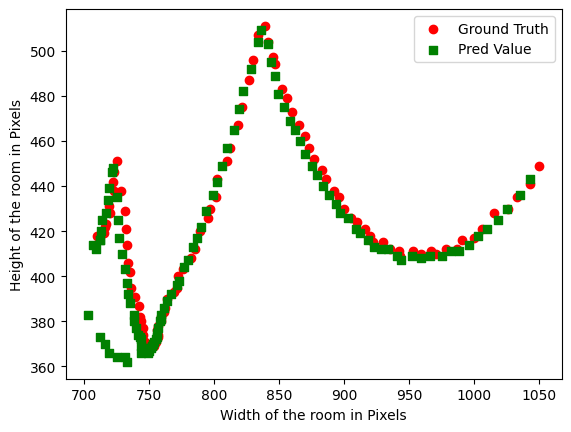

In [8]:
from matplotlib import markers
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x2, y2, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

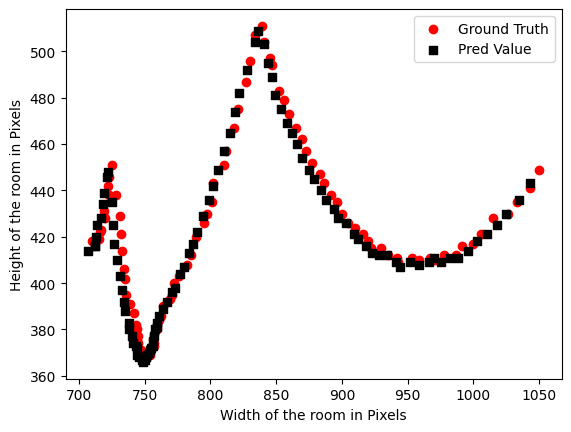

In [13]:
x3 = df3['bbox_x']
y3 = df3['bbox_y']
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x3, y3, marker='s', color='black', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [14]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x3,y3))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [15]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]

error = avg_displacement_error(predicted_coordinates, ground_coordinates)
print(error)

3.759233848442077


In [18]:
len(predicted_coordinates)

100

In [16]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)

error = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print(error)

0.10110352959927706


Yolov8 pred with image size 720x1280. sort of

In [5]:
df4 = pd.read_csv('labelsPredv8_640.csv', sep=',', delimiter=None)
df4

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,ball,712,416,15,15,left002001.png,1280,720
1,ball,710,414,22,23,left002002.png,1280,720
2,ball,708,414,27,27,left002003.png,1280,720
3,ball,712,420,27,26,left002004.png,1280,720
4,ball,713,423,26,26,left002005.png,1280,720
...,...,...,...,...,...,...,...,...
95,ball,1010,419,27,26,left002096.png,1280,720
96,ball,1018,422,27,27,left002097.png,1280,720
97,ball,1026,429,28,25,left002098.png,1280,720
98,ball,1034,434,28,27,left002099.png,1280,720


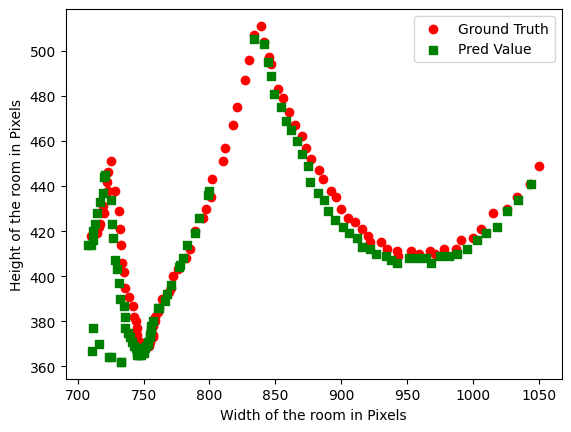

In [7]:
x1 = df['bbox_x']
y1 = df['bbox_y']
x4 = df4['bbox_x']
y4 = df4['bbox_y']

from matplotlib import markers
plt.scatter(x1, y1, marker='o', color='red', label='Ground Truth')
plt.scatter(x4, y4, marker='s', color='green', label='Pred Value')
plt.xlabel('Width of the room in Pixels')
plt.ylabel('Height of the room in Pixels')
plt.legend()
plt.show()

In [8]:
count = 0
for i in range(len(x1)):
    predicted_coordinates = list(zip(x4,y4))
    ground_coordinates = list(zip(x1,y1))
    count += 1

In [9]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

# predicted_coordinates = [[1, 2], [3, 4], [5, 6], [7, 8]]
# ground_truth_coordinates = [[2, 3], [4, 5], [6, 7], [8, 9]]

error = avg_displacement_error(predicted_coordinates, ground_coordinates)
print(error)

15.830481277097642


In [10]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)

error = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print(error)

0.4689281206946162
